In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import PercentFormatter
myFmt100 = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

In [2]:
df = pd.read_excel('http://taanila.fi/kunnat.xlsx', sheet_name = 'Kuntien avainluvut')
df.head(7)

,Kunta,"Taajama-aste, %, 2017","Väkiluku, 2018","Väkiluvun muutos edellisestä vuodesta, %, 2018","Alle 15-vuotiaiden osuus väestöstä, %, 2018","15-64 -vuotiaiden osuus väestöstä, %, 2018","Yli 64-vuotiaiden osuus väestöstä, %, 2018","Ruotsinkielisten osuus väestöstä, %, 2018","Ulkomaan kansalaisten osuus väestöstä, %, 2018","Syntyneiden enemmyys, henkilöä, 2018",...,"Alueella olevien työpaikkojen lukumäärä, 2016","Alkutuotannon työpaikkojen osuus, %, 2016","Jalostuksen työpaikkojen osuus, %, 2016","Palvelujen työpaikkojen osuus, %, 2016","Työpaikkaomavaraisuus, 2016","Vuosikate, euroa/asukas, 2017","Lainakanta, euroa/asukas, 2017","Konsernin lainakanta, euroa/asukas, 2017","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2017","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2017"
0,Akaa,88.5,16611,-0.9,17.7,59.4,22.9,0.2,1.7,-87,...,4512,3.3,35.6,59.5,67.8,370.2,3139.1,3927.7,1579.9,3231.2
1,Alajärvi,60.7,9700,-1.3,17.4,55.4,27.2,0.1,2.1,-49,...,3330,11.6,26.4,59.9,96.8,674.0,2152.1,4235.1,2152.6,3579.3
2,Alavieska,52.6,2573,-1.4,19.4,57.0,23.7,0.2,0.6,-4,...,741,24.4,21.6,52.0,75.6,276.2,2988.9,3182.4,1837.5,3995.8
3,Alavus,59.5,11544,-1.4,17.0,56.1,26.9,0.1,1.1,-65,...,4355,9.9,23.3,65.6,99.5,466.4,3307.6,6004.2,1780.8,3886.5
4,Asikkala,64.4,8149,-1.2,14.2,53.6,32.2,0.2,1.7,-70,...,2318,9.4,27.4,60.8,75.7,577.5,1453.7,3014.4,1607.9,3476.6
5,Askola,53.2,4958,-0.6,20.1,60.9,19.1,3.4,1.7,0,...,1373,8.7,38.2,51.0,61.3,166.1,3894.0,4928.7,2014.0,2912.2
6,Aura,69.9,3984,-0.2,19.8,61.6,18.6,0.7,2.4,2,...,1127,5.2,34.3,57.9,63.3,700.8,3000.8,3702.1,1719.9,2723.1


In [3]:
df.shape

(311, 33)

In [4]:
df.columns

Index(['Kunta', 'Taajama-aste, %, 2017', 'Väkiluku, 2018',
       'Väkiluvun muutos edellisestä vuodesta, %, 2018',
       'Alle 15-vuotiaiden osuus väestöstä, %, 2018',
       '15-64 -vuotiaiden osuus väestöstä, %, 2018',
       'Yli 64-vuotiaiden osuus väestöstä, %, 2018',
       'Ruotsinkielisten osuus väestöstä, %, 2018',
       'Ulkomaan kansalaisten osuus väestöstä, %, 2018',
       'Syntyneiden enemmyys, henkilöä, 2018',
       'Kuntien välinen muuttovoitto/-tappio, henkilöä, 2018',
       'Perheiden lukumäärä, 2018', 'Asuntokuntien lukumäärä, 2018',
       'Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2018',
       'Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2017',
       'Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2017',
       'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2017',
       'Alueella asuvan työllisen työvoiman määrä, 2017',
       'Työllisyysaste, %, 2017',
       'Asuinkunnassaan ty

In [5]:
# Keskitytään väkilukuun, joten dropataan muut sarakkeet
df.drop(['Taajama-aste, %, 2017', 'Väkiluvun muutos edellisestä vuodesta, %, 2018', 'Syntyneiden enemmyys, henkilöä, 2018',
       'Kuntien välinen muuttovoitto/-tappio, henkilöä, 2018',
       'Perheiden lukumäärä, 2018', 'Asuntokuntien lukumäärä, 2018',
       'Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2018',
       'Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2017',
       'Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2017',
       'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2017',
       'Alueella asuvan työllisen työvoiman määrä, 2017',
       'Työllisyysaste, %, 2017',
       'Asuinkunnassaan työssäkäyvien osuus, %, 2016',
       'Työttömien osuus työvoimasta, %, 2017',
       'Eläkeläisten osuus väestöstä, %, 2017',
       'Taloudellinen huoltosuhde, 2017',
       'Alueella olevien työpaikkojen lukumäärä, 2016',
       'Alkutuotannon työpaikkojen osuus, %, 2016',
       'Jalostuksen työpaikkojen osuus, %, 2016',
       'Palvelujen työpaikkojen osuus, %, 2016', 'Työpaikkaomavaraisuus, 2016',
       'Vuosikate, euroa/asukas, 2017', 'Lainakanta, euroa/asukas, 2017',
       'Konsernin lainakanta, euroa/asukas, 2017',
       'Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2017',
       'Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2017'], axis = 1, inplace=True)
df.head()

,Kunta,"Väkiluku, 2018","Alle 15-vuotiaiden osuus väestöstä, %, 2018","15-64 -vuotiaiden osuus väestöstä, %, 2018","Yli 64-vuotiaiden osuus väestöstä, %, 2018","Ruotsinkielisten osuus väestöstä, %, 2018","Ulkomaan kansalaisten osuus väestöstä, %, 2018"
0,Akaa,16611,17.7,59.4,22.9,0.2,1.7
1,Alajärvi,9700,17.4,55.4,27.2,0.1,2.1
2,Alavieska,2573,19.4,57.0,23.7,0.2,0.6
3,Alavus,11544,17.0,56.1,26.9,0.1,1.1
4,Asikkala,8149,14.2,53.6,32.2,0.2,1.7


In [6]:
# Nimetään sarakkeet uudelleen
df.rename(columns={'Alle 15-vuotiaiden osuus väestöstä, %, 2018':'Alle 15-vuotiaita, %, 2018',
                   '15-64 -vuotiaiden osuus väestöstä, %, 2018':'15-64 -vuotiaita, %, 2018',
                   'Yli 64-vuotiaiden osuus väestöstä, %, 2018':'Yli 64-vuotiaita, %, 2018',
                  'Ruotsinkielisten osuus väestöstä, %, 2018':'Ruotsinkielisiä, %, 2018',
                  'Ulkomaan kansalaisten osuus väestöstä, %, 2018':'Ulkomaalaisia, %, 2018'}, inplace=True)
df.head()

,Kunta,"Väkiluku, 2018","Alle 15-vuotiaita, %, 2018","15-64 -vuotiaita, %, 2018","Yli 64-vuotiaita, %, 2018","Ruotsinkielisiä, %, 2018","Ulkomaalaisia, %, 2018"
0,Akaa,16611,17.7,59.4,22.9,0.2,1.7
1,Alajärvi,9700,17.4,55.4,27.2,0.1,2.1
2,Alavieska,2573,19.4,57.0,23.7,0.2,0.6
3,Alavus,11544,17.0,56.1,26.9,0.1,1.1
4,Asikkala,8149,14.2,53.6,32.2,0.2,1.7


In [7]:
df.columns

Index(['Kunta', 'Väkiluku, 2018', 'Alle 15-vuotiaita, %, 2018',
       '15-64 -vuotiaita, %, 2018', 'Yli 64-vuotiaita, %, 2018',
       'Ruotsinkielisiä, %, 2018', 'Ulkomaalaisia, %, 2018'],
      dtype='object')

In [8]:
# Lasketaan taulukkoon ikäluokkien väkiluvut lukumääräisinä.
df.insert(2, 'Alle 15-vuotiaita, lkm, 2018', df['Väkiluku, 2018'] * df['Alle 15-vuotiaita, %, 2018']/100)
df['Alle 15-vuotiaita, lkm, 2018'] = df['Alle 15-vuotiaita, lkm, 2018'].astype(float).round(1)
df.insert(4, '15-64 -vuotiaita, lkm, 2018', df['Väkiluku, 2018'] * df['15-64 -vuotiaita, %, 2018']/100)
df['15-64 -vuotiaita, lkm, 2018'] = df['15-64 -vuotiaita, lkm, 2018'].astype(float).round(1)
df.insert(6, 'Yli 64-vuotiaita, lkm, 2018', df['Väkiluku, 2018'] * df['Yli 64-vuotiaita, %, 2018']/100)
df['Yli 64-vuotiaita, lkm, 2018'] = df['Yli 64-vuotiaita, lkm, 2018'].astype(float).round(1)
df.insert(8, 'Ruotsinkielisiä, lkm, 2018', df['Väkiluku, 2018'] * df['Ruotsinkielisiä, %, 2018']/100)
df['Ruotsinkielisiä, lkm, 2018'] = df['Ruotsinkielisiä, lkm, 2018'].astype(float).round(1)
df.insert(10, 'Ulkomaalaisia, lkm, 2018', df['Väkiluku, 2018'] *  df['Ulkomaalaisia, %, 2018']/100)
df['Ulkomaalaisia, lkm, 2018'] = df['Ulkomaalaisia, lkm, 2018'].astype(float).round(1)
df.head()

,Kunta,"Väkiluku, 2018","Alle 15-vuotiaita, lkm, 2018","Alle 15-vuotiaita, %, 2018","15-64 -vuotiaita, lkm, 2018","15-64 -vuotiaita, %, 2018","Yli 64-vuotiaita, lkm, 2018","Yli 64-vuotiaita, %, 2018","Ruotsinkielisiä, lkm, 2018","Ruotsinkielisiä, %, 2018","Ulkomaalaisia, lkm, 2018","Ulkomaalaisia, %, 2018"
0,Akaa,16611,2940.1,17.7,9866.9,59.4,3803.9,22.9,33.2,0.2,282.4,1.7
1,Alajärvi,9700,1687.8,17.4,5373.8,55.4,2638.4,27.2,9.7,0.1,203.7,2.1
2,Alavieska,2573,499.2,19.4,1466.6,57.0,609.8,23.7,5.1,0.2,15.4,0.6
3,Alavus,11544,1962.5,17.0,6476.2,56.1,3105.3,26.9,11.5,0.1,127.0,1.1
4,Asikkala,8149,1157.2,14.2,4367.9,53.6,2624.0,32.2,16.3,0.2,138.5,1.7


In [9]:
# Keskitytään muutamaan Keski-Suomen kunnan väkilukuun
df1 = df.loc[df['Kunta'].isin(['Viitasaari', 'Pihtipudas', 'Kannonkoski', 'Saarijärvi'])]
df1.head()

,Kunta,"Väkiluku, 2018","Alle 15-vuotiaita, lkm, 2018","Alle 15-vuotiaita, %, 2018","15-64 -vuotiaita, lkm, 2018","15-64 -vuotiaita, %, 2018","Yli 64-vuotiaita, lkm, 2018","Yli 64-vuotiaita, %, 2018","Ruotsinkielisiä, lkm, 2018","Ruotsinkielisiä, %, 2018","Ulkomaalaisia, lkm, 2018","Ulkomaalaisia, %, 2018"
74,Kannonkoski,1353,179.9,13.3,706.3,52.2,466.8,34.5,1.4,0.1,21.6,1.6
197,Pihtipudas,4053,612.0,15.1,2229.2,55.0,1207.8,29.8,0.0,0.0,24.3,0.6
234,Saarijärvi,9415,1327.5,14.1,5197.1,55.2,2890.4,30.7,9.4,0.1,94.2,1.0
299,Viitasaari,6264,720.4,11.5,3376.3,53.9,2167.3,34.6,6.3,0.1,56.4,0.9


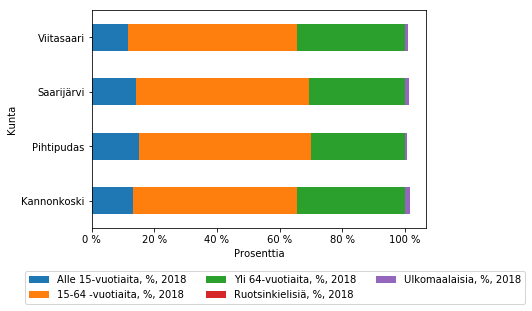

In [10]:
# Plotataan valituista kunnista prosentit ikäluokittain.
list=[]
for col in df.columns:
    if '%' in col:
        list.append(col)
ax1 = df1.plot.barh(stacked = True, x = 'Kunta', y = list)
ax1.set_xlabel('Prosenttia')
ax1.xaxis.set_major_formatter(myFmt100)
ax1.legend(loc = (-0.20,-0.35), ncol = 3)

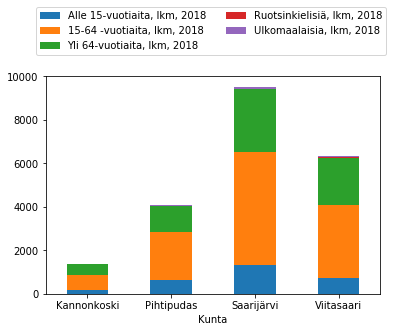

In [26]:
# Plotataan valituista kunnista lukumäärät ikäluokittain
list=[]
for col in df.columns:
    if 'lkm' in col:
        list.append(col)
ax2 = df1.plot.bar(stacked = True, x = 'Kunta', y = list, rot = 0)
ax2.set_xlabel('Kunta')
ax2.legend(loc = (-0.03, 1.1), ncol = 2)

Text(0, 0.5, 'Henkilöä')

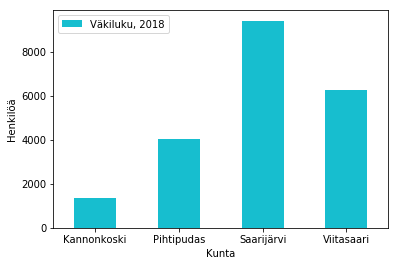

In [36]:
# Plotataan vielä valittujen kuntien väkiluku vuonna 2018
list=[]
for col in df.columns:
    if 'Väkiluku, 2018' in col:
        list.append(col)
ax3 = df1.plot.bar(x = 'Kunta', y = list, rot = 0, color = 'C9')
ax3.set_ylabel('Henkilöä')